<a href="https://colab.research.google.com/github/rbbh/ARIMA-SVR-PSO-ensemble/blob/master/N_Experiments_of_ARIMA_%2B_(SVR_%2B_PSO)_Val_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn import svm
from mpl_toolkits.mplot3d import axes3d, Axes3D
from google.colab import files

In [0]:
import io
import pandas as pd

In [49]:
uploaded = files.upload()   

Saving pollution.txt to pollution.txt


In [0]:
data = pd.read_csv(io.BytesIO(uploaded['pollution.txt']))

In [51]:
uploaded = files.upload()

Saving pollution_ARIMA.txt to pollution_ARIMA.txt


In [0]:
data_ARIMA = pd.read_csv(io.BytesIO(uploaded['pollution_ARIMA.txt']))

In [53]:
uploaded = files.upload()

Saving pollution_r.txt to pollution_r.txt


In [0]:
data_r = pd.read_csv(io.BytesIO(uploaded['pollution_r.txt']))

In [55]:
data_r.describe()

Residuo
count    $130.00
mean      $12.50
std      $424.26
min   $-1,365.36
25%      $-95.11
50%       $24.59
75%      $163.39
max    $1,323.27

Original time series:



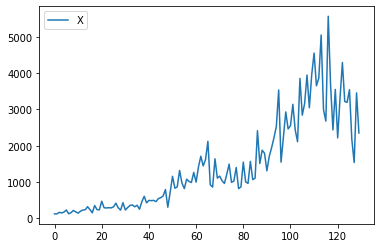

In [56]:
print('Original time series:\n')
data.plot()

Residuals over time:



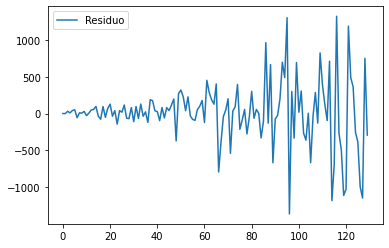

In [57]:
print('Residuals over time:\n')
data_r.plot()

In [58]:
len(data)

130

In [0]:
#Scaling the data
from sklearn import preprocessing

data_r_n = data_r.copy()

data_r_n = (data_r - data_r.min())/(data_r.max() - data_r.min())

data_r_n = pd.DataFrame(data_r_n)



In [60]:
# TODO: Create function for the Lag used for the prediction
# We will use 12 for the lag dimension if the series repeats 
# itself annually, 3 if it is trimestrial etc.

# Note: For the "ONS" data base, make "dimensions" = 3
# NOTE: For the "Milk" data base, make "dimensions" = 24

dimensions = 12
data_cn = pd.concat([data_r_n.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_cn)

     Residuo  Residuo  Residuo  Residuo  ...  Residuo  Residuo  Residuo  Residuo
0      $0.51     $nan     $nan     $nan  ...     $nan     $nan     $nan     $nan
1      $0.51    $0.51     $nan     $nan  ...     $nan     $nan     $nan     $nan
2      $0.52    $0.51    $0.51     $nan  ...     $nan     $nan     $nan     $nan
3      $0.51    $0.52    $0.51    $0.51  ...     $nan     $nan     $nan     $nan
4      $0.52    $0.51    $0.52    $0.51  ...     $nan     $nan     $nan     $nan
..       ...      ...      ...      ...  ...      ...      ...      ...      ...
125    $0.36    $0.41    $0.64    $0.69  ...    $1.00    $0.25    $0.07    $0.77
126    $0.14    $0.36    $0.41    $0.64  ...    $0.41    $1.00    $0.25    $0.07
127    $0.08    $0.14    $0.36    $0.41  ...    $0.32    $0.41    $1.00    $0.25
128    $0.79    $0.08    $0.14    $0.36  ...    $0.09    $0.32    $0.41    $1.00
129    $0.40    $0.79    $0.08    $0.14  ...    $0.13    $0.09    $0.32    $0.41

[130 rows x 13 columns]


In [61]:
# Splitting the residual data into train, validation and test

from sklearn.model_selection import train_test_split

X = data_cn.iloc[12:,1:]

y = data_cn.iloc[12:,0]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3983, shuffle = False)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5531, shuffle = False)


print(len(y_val))
print(len(y_test))
print(len(y_train))


21
26
71


In [62]:
dimensions = 12
data_c2n = pd.concat([data_ARIMA.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_c2n)

        ARIMA     ARIMA     ARIMA  ...     ARIMA     ARIMA     ARIMA
0     $122.52      $nan      $nan  ...      $nan      $nan      $nan
1     $122.04   $122.52      $nan  ...      $nan      $nan      $nan
2     $133.96   $122.04   $122.52  ...      $nan      $nan      $nan
3     $138.39   $133.96   $122.04  ...      $nan      $nan      $nan
4     $131.11   $138.39   $133.96  ...      $nan      $nan      $nan
..        ...       ...       ...  ...       ...       ...       ...
125 $3,931.73 $3,447.11 $2,853.04  ... $3,366.45 $4,175.08 $4,336.60
126 $3,167.15 $3,931.73 $3,447.11  ... $4,242.83 $3,366.45 $4,175.08
127 $2,685.96 $3,167.15 $3,931.73  ... $3,928.89 $4,242.83 $3,366.45
128 $2,704.11 $2,685.96 $3,167.15  ... $2,932.00 $3,928.89 $4,242.83
129 $2,644.67 $2,704.11 $2,685.96  ... $4,664.83 $2,932.00 $3,928.89

[130 rows x 13 columns]


In [63]:
# Splitting the ARIMA predictions into train, validation and test

from sklearn.model_selection import train_test_split

X_ARIMA = data_c2n.iloc[12:,1:]

y_ARIMA = data_c2n.iloc[12:,0]

X_train_ARIMA, X_val_ARIMA, y_train_ARIMA, y_val_ARIMA = train_test_split(X_ARIMA, y_ARIMA, test_size = 0.3983, shuffle = False)

X_val_ARIMA, X_test_ARIMA, y_val_ARIMA, y_test_ARIMA = train_test_split(X_val_ARIMA, y_val_ARIMA, test_size = 0.5531, shuffle = False)

print(len(y_val_ARIMA))
print(len(y_test_ARIMA))
print(len(y_train_ARIMA))

21
26
71


In [64]:
dimensions = 12
data_c3n = pd.concat([data.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_c3n)

            X         X         X  ...         X         X         X
0     $122.64      $nan      $nan  ...      $nan      $nan      $nan
1     $120.89   $122.64      $nan  ...      $nan      $nan      $nan
2     $164.69   $120.89   $122.64  ...      $nan      $nan      $nan
3     $147.17   $164.69   $120.89  ...      $nan      $nan      $nan
4     $171.70   $147.17   $164.69  ...      $nan      $nan      $nan
..        ...       ...       ...  ...       ...       ...       ...
125 $3,542.54 $3,193.02 $3,218.42  ... $2,677.06 $2,990.66 $5,048.39
126 $2,169.85 $3,542.54 $3,193.02  ... $5,566.10 $2,677.06 $2,990.66
127 $1,536.50 $2,169.85 $3,542.54  ... $3,661.68 $5,566.10 $2,677.06
128 $3,454.94 $1,536.50 $2,169.85  ... $2,435.28 $3,661.68 $5,566.10
129 $2,351.18 $3,454.94 $1,536.50  ... $3,550.43 $2,435.28 $3,661.68

[130 rows x 13 columns]


In [65]:
# Splitting the raw data into train, validation and test

from sklearn.model_selection import train_test_split

X_raw = data_c3n.iloc[12:,1:]

y_raw = data_c3n.iloc[12:,0]

X_train_raw, X_val_raw, y_train_raw, y_val_raw = train_test_split(X_raw, y_raw, test_size = 0.3983, shuffle = False)

X_val_raw, X_test_raw, y_val_raw, y_test_raw = train_test_split(X_val_raw, y_val_raw, test_size = 0.5531, shuffle = False)

print(len(y_val_raw))
print(len(y_test_raw))
print(len(y_train_raw))

21
26
71


In [0]:
def pso(n_particles, iterations, dimensions, inertia, k_best_particles, experiments):

    # Range of SVR's hyperparameters (Particles' search space)
    # C, Epsilon and Gamma
    max_c = 1e4
    min_c = 1e-3
    max_e = 1e-1
    min_e = 1e-8
    max_g = 1e3
    min_g = 1e-3
    

    # Initializing regression variables    
    p_best_RGS = np.empty((n_particles), dtype = object);
    g_best_RGS = sys.maxsize

    # Initializing variables for experiment collection
    g_bests = []
    g_bests_RGS_experiment = []
    mse_residuals = []
    mse_residuals_val = []
    final_experiment_predictions = []
    final_experiment_predictions_val = []

    last_configurations = []
    
    average_particles = []
    average_particles_val = []
    mse_averages = []
    mse_averages_val = []
    final_experiment_averages = []
    final_experiment_averages_val = []

    median_particles = []
    median_particles_val = []
    mse_medians = []
    mse_medians_val = []
    final_experiment_medians = []
    final_experiment_medians_val = []

    average_k_best_predictions = []
    average_k_best_predictions_val = []
    mse_averages_k_best = []
    mse_averages_k_best_val = []
    final_experiment_k_averages = []
    final_experiment_k_averages_val = []

    median_k_best_predictions = []
    median_k_best_predictions_val = []
    mse_medians_k_best = []
    mse_medians_k_best_val = []
    final_experiment_k_medians = []
    final_experiment_k_medians_val = []

    mse_ARIMA = []
    mse_ARIMA_val = []
    
    mse_ensemble = []
    mse_ensemble_val = []

    from sklearn.metrics import mean_squared_error

    for e in range(experiments):
      
        # Initializing particles' positions randomly, inside
        # the search space
        x = np.random.rand(n_particles, 1)*(max_c - min_c) + min_c
        y = np.random.rand(n_particles, 1)*(max_e - min_e) + min_e
        z = np.random.rand(n_particles, 1)*(max_g - min_g) + min_g

        c = np.concatenate((x,y,z), axis=1)

        if(e == 0):
            # Displaying tridimensional search space
            plot(c)

        # Initializing particles' parameters
        v = np.zeros((n_particles, dimensions))
        c1 = 2
        c2 = 2
        p_best = np.zeros((n_particles, dimensions))
        p_best_val = np.zeros(n_particles) + sys.maxsize  
        g_best = np.zeros(dimensions)
        g_best_val = sys.maxsize

        best_iter = np.zeros(iterations)

        for i in range(iterations):

            for j in range(n_particles):
              
                # Starting Regression
                rgs = svm.SVR(C = c[j][0], epsilon = c[j][1], gamma = c[j][2])

                # Fitting the curve
                rgs.fit(X_train, y_train)
                y_predict = rgs.predict(X_val)

                # Using Mean Squared Error to verify prediction accuracy
                mse = mean_squared_error(y_val, y_predict) 

                # If mse value for that search point, for that particle,
                # is less than its personal best point,
                # replace personal best
                if(mse < p_best_val[j]):   
                    # The value below represents the current least Mean Squared Error
                    p_best_val[j] = mse
                    
                    # The value below represents the current least Regressor
                    p_best_RGS[j] = rgs
                                

                    # The value below represents the current search coordinates for
                    # the particle's current least Mean Squared Error found
                    p_best[j] = c[j].copy()
                    
                # Using auxiliar variable to get the index of the
                # particle that found the configuration with the 
                # minimum MSE value
                aux = np.argmin(p_best_val)        
              
                if(p_best_val[aux] < g_best_val):
                    # Assigning Particle's current best MSE to the Group's best    
                    g_best_val = p_best_val[aux]

                    # Assigning Particle's current best configuration to the Group's best
                    g_best = p_best[aux].copy()

                    # Group best regressor:
                    # the combination of C, Epsilon and Gamma
                    # that computes the best fitting curve
                    g_best_RGS = p_best_RGS[aux]

              
                rand1 = np.random.random()
                rand2 = np.random.random()

                # The variable below influences directly the particle's velocity.
                # It can either make it smaller or bigger. 
                w = inertia

                # The equation below represents Particle's velocity, which is
                # the rate of change in its position
                v[j] = w*v[j] + c1*(p_best[j] - c[j])*rand1 + c2*(g_best - c[j])*rand2

                # Change in the Particle's position 
                c[j] = c[j] + v[j]

                # Below is a series of conditions that stop the particles from
                # leaving the search space
                if(c[j][2] < min_g):
                  c[j][2] = min_g
                if(c[j][2] > max_g):
                  c[j][2] = max_g
                if(c[j][1] < min_e):
                  c[j][1] = min_e
                if(c[j][1] > max_e):
                  c[j][1] = max_e
                if(c[j][0] < min_c):
                  c[j][0] = min_c
                if(c[j][0] > max_c):
                  c[j][0] = max_c
                
        
        # Storing last particles` positions
        # for later use
        last_configurations.append(c)

        # Making the prediction with the best configuration of C, Epsilon and
        # Gamma found by the particles
        predict_val = g_best_RGS.predict(X_val)
        
        predict_test = g_best_RGS.predict(X_test)

     
        g_bests_RGS_experiment.append(g_best_RGS)
        g_bests.append(g_best)

      
        mse_r_val = mean_squared_error(y_val, predict_val)
        mse_r = mean_squared_error(y_test, predict_test)
        
   
        mse_residuals_val.append(mse_r_val)
        mse_residuals.append(mse_r)

       
        # Taking all particles' final predictions,
        # getting their averages and medians and
        # getting the k best subset of particles
        # to see the final prediction without outliers
        k = k_best_particles
        average_p_val, median_p_val, av_k_best_p_val, md_k_best_p_val = particles_last_predictions(c, n_particles, k, X_val, y_val)
        average_p, median_p, av_k_best_p, md_k_best_p = particles_last_predictions(c, n_particles, k, X_test, y_test)
       
        average_particles_val.append(average_p_val)
        median_particles_val.append(median_p_val)
        average_k_best_predictions_val.append(av_k_best_p_val)
        median_k_best_predictions_val.append(md_k_best_p_val)
             
        average_particles.append(average_p)
        median_particles.append(median_p)
        average_k_best_predictions.append(av_k_best_p)
        median_k_best_predictions.append(md_k_best_p)
       
        mse_e_val, mse_AR_val = residual_performance(predict_val, y_val_ARIMA, y_val_raw)
       
        mse_e, mse_AR = residual_performance(predict_test, y_test_ARIMA, y_test_raw)
       
        # Storing the Ensemble's (final system) mse
        mse_ARIMA_val.append(mse_AR_val)
        mse_ensemble_val.append(mse_e_val)
        
        mse_ARIMA.append(mse_AR)
        mse_ensemble.append(mse_e)
     
        # Storing the mse of the average predictions
        mse_A_val, mse_AR_val = residual_performance(average_p_val, y_val_ARIMA, y_val_raw)
        mse_A, mse_AR = residual_performance(average_p, y_test_ARIMA, y_test_raw)
   
        mse_averages_val.append(mse_A_val)
        mse_averages.append(mse_A)
       
        # Storing the mse of the average k best predictions
        mse_A_k_best_val, mse_AR_val = residual_performance(av_k_best_p_val, y_val_ARIMA, y_val_raw)
        mse_A_k_best, mse_AR = residual_performance(av_k_best_p, y_test_ARIMA, y_test_raw)
        
        mse_averages_k_best_val.append(mse_A_k_best_val)
        mse_averages_k_best.append(mse_A_k_best)
        
        # Storing the mse of the median predictions
        mse_M_val, mse_AR_val = residual_performance(median_p_val, y_val_ARIMA, y_val_raw)
        mse_M, mse_AR = residual_performance(median_p, y_test_ARIMA, y_test_raw)
        
        mse_medians_val.append(mse_M_val)
        mse_medians.append(mse_M)
        
        # Storing the mse of the median k best predictions
        mse_M_k_best_val, mse_AR_val = residual_performance(md_k_best_p_val, y_val_ARIMA, y_val_raw)
        mse_M_k_best, mse_AR = residual_performance(md_k_best_p, y_test_ARIMA, y_test_raw)
      
        mse_medians_k_best_val.append(mse_M_k_best_val)
        mse_medians_k_best.append(mse_M_k_best)
      
        # Getting the final results of the current experiment
        # and storing them
        final_exp_p_val, final_exp_av_val, final_exp_md_val, final_exp_av_k_val, final_exp_md_k_val = results(g_best_RGS, average_p_val, median_p_val, av_k_best_p_val, md_k_best_p_val, y_val_raw, y_val_ARIMA, X_val)
               

        final_exp_p, final_exp_av, final_exp_md, final_exp_av_k, final_exp_md_k = results(g_best_RGS, average_p, median_p, av_k_best_p, md_k_best_p, y_test_raw, y_test_ARIMA, X_test)
        
     

        final_exp_p_val = final_exp_p_val.tolist()
        final_exp_av_val = final_exp_av_val.tolist()
        final_exp_md_val = final_exp_md_val.tolist()
        final_exp_av_k_val = final_exp_av_k_val.tolist()
        final_exp_md_k_val = final_exp_md_k_val.tolist()
     
        final_exp_p = final_exp_p.tolist()
        final_exp_av = final_exp_av.tolist()
        final_exp_md = final_exp_md.tolist()
        final_exp_av_k = final_exp_av_k.tolist()
        final_exp_md_k = final_exp_md_k.tolist()
      
                
        final_experiment_predictions_val.append(final_exp_p_val)
        final_experiment_averages_val.append(final_exp_av_val)
        final_experiment_medians_val.append(final_exp_md_val)
        final_experiment_k_averages_val.append(final_exp_av_k_val)
        final_experiment_k_medians_val.append(final_exp_md_k_val)
     
        final_experiment_predictions.append(final_exp_p)
        final_experiment_averages.append(final_exp_av)
        final_experiment_medians.append(final_exp_md)
        final_experiment_k_averages.append(final_exp_av_k)
        final_experiment_k_medians.append(final_exp_md_k)
      
        print('\nExperiment # %d: done. MSE_g_Best_val: %f; MSE_AV_val: %f; MSE_MD_val: %f; MSE_k_AV_val: %f; MSE_k_MD_val: %f\n'%(e+1, mse_e_val, mse_A_val, mse_M_val, mse_A_k_best_val,mse_M_k_best_val))
        print('\nMSE_g_Best: %f; MSE_AV: %f; MSE_MD: %f; MSE_k_AV: %f; MSE_k_MD: %f\n'%(mse_e, mse_A, mse_M, mse_A_k_best, mse_M_k_best)) 
                                                                             
                                                                              

    aux_result_1_val = np.argmin(mse_ensemble_val)
    aux_result_1 = np.argmin(mse_ensemble)

    mse_final_val = mse_ensemble_val[aux_result_1_val]
    mse_final = mse_ensemble[aux_result_1]

    #print('Debug 1')

    aux_result_2_val = np.argmin(mse_residuals_val)
    aux_result_2 = np.argmin(mse_residuals)

    best_regression = g_bests_RGS_experiment[aux_result_2]
    best_configuration = g_bests[aux_result_2]

    c = last_configurations[aux_result_2]

    probable_best_predictions_val = final_experiment_predictions_val[aux_result_2_val]
    probable_best_predictions = final_experiment_predictions[aux_result_2]

    corresponding_average_val = final_experiment_averages_val[aux_result_2_val]
    corresponding_average = final_experiment_averages[aux_result_2]

    corresponding_median_val = final_experiment_medians_val[aux_result_2_val]
    corresponding_median = final_experiment_medians[aux_result_2]

    corresponding_k_average_val = final_experiment_k_averages_val[aux_result_2_val]
    corresponding_k_average = final_experiment_k_averages[aux_result_2]

    corresponding_k_median_val = final_experiment_k_medians_val[aux_result_2_val]
    corresponding_k_median = final_experiment_k_medians[aux_result_2]

    #print('Debug 2')
    print(color.BOLD + '\n Displaying Results for the validation set\n' + color.BOLD)

    display_results(best_regression, y_val_raw, y_val_ARIMA, 
                    probable_best_predictions_val, corresponding_average_val, corresponding_median_val, 
                    corresponding_k_average_val, corresponding_k_median_val,c)

    
    print(color.BOLD + '\n Displaying Results for the test set\n' + color.BOLD)
    display_results(best_regression, y_test_raw, y_test_ARIMA, 
                    probable_best_predictions, corresponding_average, corresponding_median, 
                    corresponding_k_average, corresponding_k_median,c)
                    


    
    final_experiment_predictions_val_T = list(map(list, zip(*final_experiment_predictions_val)))
    final_experiment_averages_val_T = list(map(list, zip(*final_experiment_averages_val)))
    final_experiment_medians_val_T = list(map(list, zip(*final_experiment_medians_val)))
    final_experiment_k_averages_val_T = list(map(list, zip(*final_experiment_k_averages_val)))
    final_experiment_k_medians_val_T = list(map(list, zip(*final_experiment_k_medians_val)))


    final_experiment_predictions_T = list(map(list, zip(*final_experiment_predictions)))
    final_experiment_averages_T = list(map(list, zip(*final_experiment_averages)))
    final_experiment_medians_T = list(map(list, zip(*final_experiment_medians)))
    final_experiment_k_averages_T = list(map(list, zip(*final_experiment_k_averages)))
    final_experiment_k_medians_T = list(map(list, zip(*final_experiment_k_medians)))

    
    final_experiment_predictions_concat_val = [item for sublist in final_experiment_predictions_val for item in sublist] 
    final_experiment_averages_concat_val = [item for sublist in final_experiment_averages_val for item in sublist]
    final_experiment_medians_concat_val = [item for sublist in final_experiment_medians_val for item in sublist]
    final_experiment_k_averages_concat_val = [item for sublist in final_experiment_k_averages_val for item in sublist]
    final_experiment_k_medians_concat_val = [item for sublist in final_experiment_k_medians_val for item in sublist]


    final_experiment_predictions_concat = [item for sublist in final_experiment_predictions for item in sublist] 
    final_experiment_averages_concat = [item for sublist in final_experiment_averages for item in sublist]
    final_experiment_medians_concat = [item for sublist in final_experiment_medians for item in sublist]
    final_experiment_k_averages_concat = [item for sublist in final_experiment_k_averages for item in sublist]
    final_experiment_k_medians_concat = [item for sublist in final_experiment_k_medians for item in sublist]


    print(color.BOLD + '\nBest G-best on val set: Experiment # %d . Mean Squared Error = %f\n'%(aux_result_1_val+1, mse_final_val) + color.BOLD )  

    print(color.BOLD + '\nBest G-best on test set: Experiment # %d . Mean Squared Error = %f\n'%(aux_result_1+1, mse_final) + color.BOLD )


    pd.options.display.float_format = '${:,.2f}'.format
    final_results_val_T = pd.DataFrame()
        
    final_results_val_T["Previsoes com o G_Best (Sistema Final)"] = ''
    for p in range(len(y_val)):
        final_results_val_T["G_best_" + str(p+1)] = final_experiment_predictions_val_T[p]

    final_results_val_T["Previsoes com as Medias"] = ''
    for p in range(len(y_val)):
        final_results_val_T["Av_" + str(p+1)] = final_experiment_averages_val_T[p]

    final_results_val_T["Previsoes com as Medianas"] = ''
    for p in range(len(y_val)):
        final_results_val_T["Md_" + str(p+1)] = final_experiment_medians_val_T[p]

    final_results_val_T["Previsoes com a Media das K melhores particulas"] = ''
    for p in range(len(y_val)):       
        final_results_val_T["K_Av_" + str(p+1)] = final_experiment_k_averages_val_T[p]

    final_results_val_T["Previsoes com a Mediana das K melhores particulas"] = ''
    for p in range(len(y_val)):       
        final_results_val_T["K_Md_" + str(p+1)] = final_experiment_k_medians_val_T[p]

    
    
    pd.options.display.float_format = '${:,.2f}'.format
    final_results_T = pd.DataFrame()
        
    final_results_T["Previsoes com o G_Best (Sistema Final)"] = ''
    for p in range(len(y_test)):
        final_results_T["G_best_" + str(p+1)] = final_experiment_predictions_T[p]

    final_results_T["Previsoes com as Medias"] = ''
    for p in range(len(y_test)):
        final_results_T["Av_" + str(p+1)] = final_experiment_averages_T[p]

    final_results_T["Previsoes com as Medianas"] = ''
    for p in range(len(y_test)):
        final_results_T["Md_" + str(p+1)] = final_experiment_medians_T[p]

    final_results_T["Previsoes com a Media das K melhores particulas"] = ''
    for p in range(len(y_test)):       
        final_results_T["K_Av_" + str(p+1)] = final_experiment_k_averages_T[p]

    final_results_T["Previsoes com a Mediana das K melhores particulas"] = ''
    for p in range(len(y_test)):       
        final_results_T["K_Md_" + str(p+1)] = final_experiment_k_medians_T[p]


    pd.options.display.float_format = '${:,.2f}'.format
    final_results_val = pd.DataFrame()
        
    final_results_val["Previsoes com o G_Best (Sistema Final)"] = final_experiment_predictions_concat_val
    final_results_val["Previsoes com as Medias"] = final_experiment_averages_concat_val
    final_results_val["Previsoes com as Medianas"] = final_experiment_medians_concat_val
    final_results_val["Previsoes com a Media das K melhores particulas"] = final_experiment_k_averages_concat_val
    final_results_val["Previsoes com a Mediana das K melhores particulas"] = final_experiment_k_medians_concat_val

    
    pd.options.display.float_format = '${:,.2f}'.format
    final_results = pd.DataFrame()
        
    final_results["Previsoes com o G_Best (Sistema Final)"] = final_experiment_predictions_concat
    final_results["Previsoes com as Medias"] = final_experiment_averages_concat
    final_results["Previsoes com as Medianas"] = final_experiment_medians_concat
    final_results["Previsoes com a Media das K melhores particulas"] = final_experiment_k_averages_concat
    final_results["Previsoes com a Mediana das K melhores particulas"] = final_experiment_k_medians_concat
    

    final_mse_val = pd.DataFrame()
    
    final_mse_val["Melhores Configuracoes (G_Bests)"] = g_bests
    final_mse_val["MSE da Previsao do Sistema Final"] = mse_ensemble_val
    final_mse_val["MSE da Previsao das Medias"] = mse_averages_val
    final_mse_val["MSE da Previsao das Medianas"] = mse_medians_val
    final_mse_val["MSE da Previsao das Medias das K melhores particulas"] = mse_averages_k_best_val
    final_mse_val["MSE da Previsao das Medianas das K melhores particulas"] = mse_medians_k_best_val
    final_mse_val["MSE da Previsao do ARIMA"] = mse_ARIMA_val


    final_mse = pd.DataFrame()
    
    final_mse["Melhores Configuracoes (G_Bests)"] = g_bests
    final_mse["MSE da Previsao do Sistema Final"] = mse_ensemble
    final_mse["MSE da Previsao das Medias"] = mse_averages
    final_mse["MSE da Previsao das Medianas"] = mse_medians
    final_mse["MSE da Previsao das Medias das K melhores particulas"] = mse_averages_k_best
    final_mse["MSE da Previsao das Medianas das K melhores particulas"] = mse_medians_k_best
    final_mse["MSE da Previsao do ARIMA"] = mse_ARIMA

    final_results_val_T.to_csv("T_Val_Pollution_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

    final_results_T.to_csv("T_Test_Pollution_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

    final_results_val.to_csv("Val_Pollution_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

    final_mse_val.to_csv("Val_MSE_Pollution_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

    final_results.to_csv("Test_Pollution_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

    final_mse.to_csv("Test_MSE_Pollution_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

In [0]:
def results(regression, average, median, k_average, k_median, y_raw, y_ARIMA, X_residual):
    
    import numpy as np

    data = y_raw
    ARIMA = y_ARIMA
    ARIMA = ARIMA.to_list()
    test = X_residual

    average_residuals = average
    median_residuals = median

    k_average_residuals = k_average
    k_median_residuals = k_median
    #print('Debug Inside 1')

    #print(regression)
    
    tmp = regression.predict(test)
    #print('Debug Inside 2')


    residuals = tmp*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_A = average_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_M = median_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_A_k = k_average_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_M_k = k_median_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())

    final_predictions = ARIMA + residuals
    final_predictions_average = ARIMA + residuals_A
    final_predictions_median = ARIMA + residuals_M
    final_predictions_average_k = ARIMA + residuals_A_k
    final_predictions_median_k = ARIMA + residuals_M_k
    #print('Debug Inside 3')

    
    return final_predictions, final_predictions_average, final_predictions_median, final_predictions_average_k, final_predictions_median_k


In [0]:
def display_results(configuration, y_raw, y_ARIMA,
                    final_predictions, final_predictions_average, final_predictions_median,  
                    final_predictions_k_average, final_predictions_k_median, all_particles):

    from sklearn.metrics import mean_squared_error
    
    data = y_raw
    ARIMA = y_ARIMA

    plot(all_particles)

    mse_ARIMA = mean_squared_error(ARIMA, data)
    mse = mean_squared_error(final_predictions, data)
    mse_A = mean_squared_error(final_predictions_average, data)
    mse_M = mean_squared_error(final_predictions_median, data)
    mse_k_A = mean_squared_error(final_predictions_k_average, data)
    mse_k_M = mean_squared_error(final_predictions_k_median, data)

    print('\nMean Squared Error for the ARIMA Model:\t %f' %mse_ARIMA)
    print('\nBest Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse)
    print('\nMean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_A)
    print('\nMean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_k_A)   
    print('\nMean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_M)
    print('\nMean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_k_M)


    print('\nBest Configuration Found:\n')
    print(configuration)

    print('\n')
    print('\n')
    print(color.BOLD + '\nARIMA Model series` predicitions:\n' + color.BOLD)

    plot_results(ARIMA, y_raw)  


    print(color.BOLD + '\nEnsemble Model series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions, y_raw)


    print(color.BOLD + '\nEnsemble Model best Average series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_average, y_raw)

    
    print(color.BOLD + '\nEnsemble Model K best Average series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_k_average, y_raw)


    print(color.BOLD + '\nEnsemble Model best Median series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_median, y_raw)

    
    print(color.BOLD + '\nEnsemble Model K best Median series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_k_median, y_raw)

    print('\n')
    print('\n')

In [0]:
def plot_results(predictions, y_raw):

    plt.plot(range(len(y_raw)), y_raw, label='Real')
    plt.plot(range(len(predictions)), predictions, label='Predicted')
    plt.legend()
    plt.show()

In [0]:
def residual_performance(residual_predictions, ARIMA_predictions, raw_data):
    
    from sklearn.metrics import mean_squared_error 
    import statistics as st


    r_tmp = residual_predictions
    ARIMA = ARIMA_predictions
    data = raw_data

    # Un-scalling the residuals
    
    r = r_tmp*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())

        
    final_predictions = r + ARIMA
  

    mse1 = mean_squared_error(final_predictions, data)

    mse2 = mean_squared_error(ARIMA, data)
    

    return mse1, mse2

In [0]:
def particles_last_predictions(configurations, particles, k, X, y):
    
    from sklearn.metrics import mean_squared_error 
    import statistics as st
    
    predictions = []
    mse = []

    for p in range(particles):

        rgs = svm.SVR(C = configurations[p][0], epsilon = configurations[p][1], gamma = configurations[p][2])

        rgs.fit(X_train, y_train) 
        y_predict = rgs.predict(X) 

        mse.append(mean_squared_error(y_predict, y))
        predictions.append(y_predict)
    
    #print('Debug inside 1')

    total = [sum(x) for x in zip(*predictions)]
    #print('Debug inside 2')  
    
    average = [num/particles for num in total]
    #print('Debug inside 3')

    median = [st.median(num) for num in zip(*predictions)]

    predictions = np.array(predictions)
    id_k = np.argpartition(mse, k)
    k_best_pred = predictions[id_k[:k]]

    k_total = [sum(x) for x in zip(*k_best_pred)]

    av_k_best_pred = [num/k for num in k_total]

    md_k_best_pred = [st.median(num) for num in zip(*k_best_pred)]
    #print('Debug inside 5')


    return average, median, av_k_best_pred, md_k_best_pred

In [0]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'



In [0]:
# Function that displays tridimensional plot
def plot(some_list):
 
    ax = Axes3D(plt.figure())
    ax.scatter3D(some_list[:,0], some_list[:,1], some_list[:,2], color = 'b')
    ax.set_xlabel('$C$', fontsize = 20)
    ax.set_ylabel('$\epsilon$', fontsize = 25)
    ax.zaxis.set_rotate_label(False) 
    ax.set_zlabel('$\gamma$', fontsize=30, rotation = 0)
    ax.zaxis._axinfo['label']['space_factor'] = 1.0
    plt.show()

    print('\n')
    print('\n')

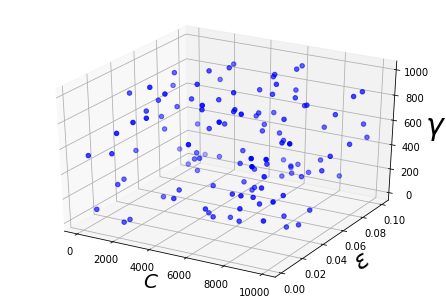






Experiment # 1: done. MSE_g_Best_val: 242666.298345; MSE_AV_val: 258972.455944; MSE_MD_val: 259140.676214; MSE_k_AV_val: 244482.392734; MSE_k_MD_val: 244760.930817


MSE_g_Best: 486301.154908; MSE_AV: 478300.460616; MSE_MD: 480387.614886; MSE_k_AV: 444902.612180; MSE_k_MD: 448656.880935


Experiment # 2: done. MSE_g_Best_val: 245503.051036; MSE_AV_val: 265740.225449; MSE_MD_val: 252516.111644; MSE_k_AV_val: 247682.041546; MSE_k_MD_val: 248012.950279


MSE_g_Best: 495582.718465; MSE_AV: 466140.667318; MSE_MD: 489607.463237; MSE_k_AV: 449849.727820; MSE_k_MD: 450175.311782


Experiment # 3: done. MSE_g_Best_val: 240450.305073; MSE_AV_val: 259666.595144; MSE_MD_val: 256126.957871; MSE_k_AV_val: 244012.342515; MSE_k_MD_val: 243808.819338


MSE_g_Best: 485461.986572; MSE_AV: 475238.717621; MSE_MD: 489292.178375; MSE_k_AV: 436071.360273; MSE_k_MD: 443065.200099


Experiment # 4: done. MSE_g_Best_val: 242191.376373; MSE_AV_val: 259956.905037; MSE_MD_val: 260317.833659; MSE_k_AV_val: 2446

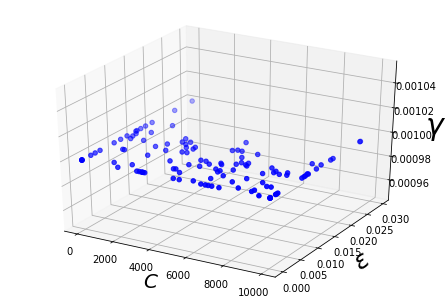






Mean Squared Error for the ARIMA Model:	 346424.193584

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 240404.399205

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 263119.552022

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 244105.237878

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 258513.435687

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 244096.181657

Best Configuration Found:

SVR(C=4830.961362584796, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.0073376176564877, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



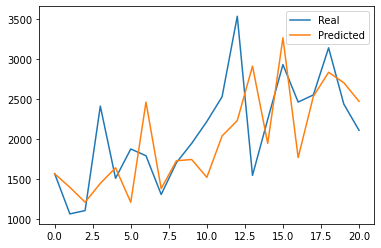


Ensemble Model series` predicitions:



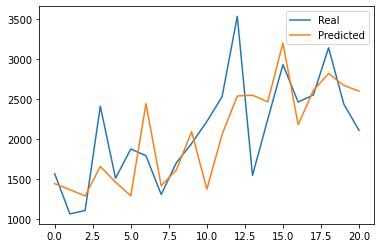


Ensemble Model best Average series` predicitions:



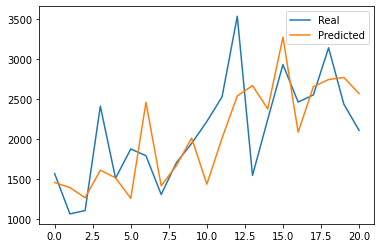


Ensemble Model K best Average series` predicitions:



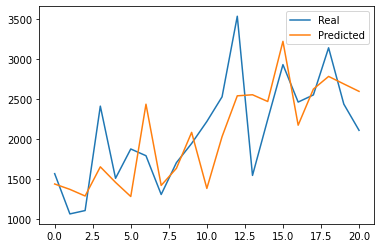


Ensemble Model best Median series` predicitions:



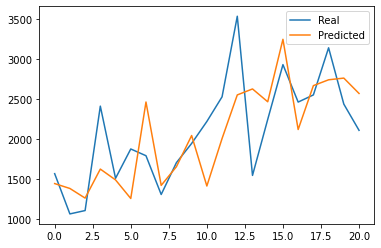


Ensemble Model K best Median series` predicitions:



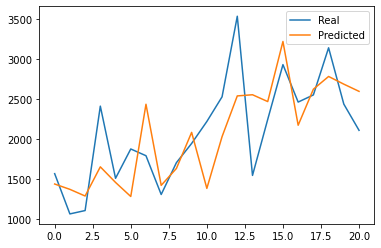






 Displaying Results for the test set



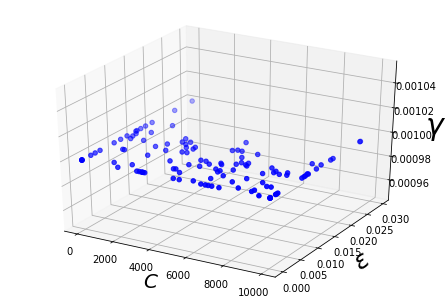






Mean Squared Error for the ARIMA Model:	 504647.685692

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 484764.867460

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 468265.075541

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 436971.698942

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 487317.319379

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 445686.242048

Best Configuration Found:

SVR(C=4830.961362584796, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.0073376176564877, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



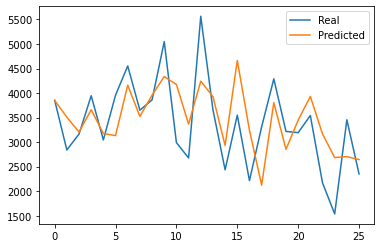


Ensemble Model series` predicitions:



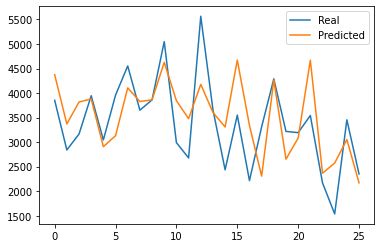


Ensemble Model best Average series` predicitions:



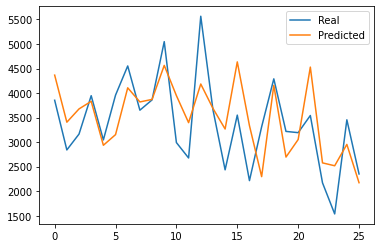


Ensemble Model K best Average series` predicitions:



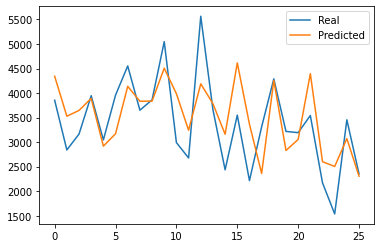


Ensemble Model best Median series` predicitions:



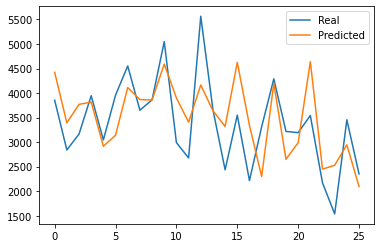


Ensemble Model K best Median series` predicitions:



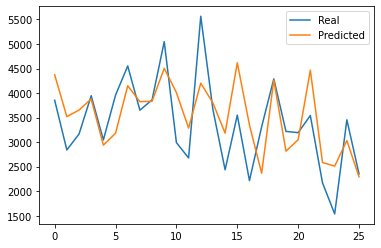






Best G-best on val set: Experiment # 5 . Mean Squared Error = 240404.399205


Best G-best on test set: Experiment # 5 . Mean Squared Error = 484764.867460



In [74]:
pso(120, 100, 3, 1, 5, 5)

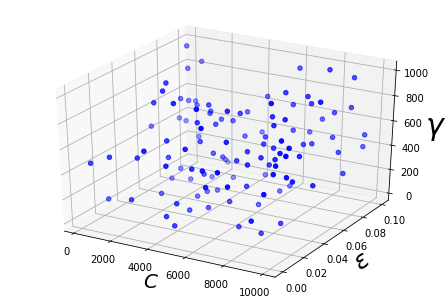






Experiment # 1: done. MSE_g_Best_val: 240353.418961; MSE_AV_val: 266542.909184; MSE_MD_val: 259777.383971; MSE_k_AV_val: 244381.503691; MSE_k_MD_val: 244049.127027


MSE_g_Best: 485102.431495; MSE_AV: 465618.774548; MSE_MD: 485112.679351; MSE_k_AV: 439619.136141; MSE_k_MD: 435680.242042


Experiment # 2: done. MSE_g_Best_val: 240127.956385; MSE_AV_val: 271609.141780; MSE_MD_val: 262710.143832; MSE_k_AV_val: 244470.158806; MSE_k_MD_val: 244619.044740


MSE_g_Best: 485452.449795; MSE_AV: 461639.740354; MSE_MD: 482244.996598; MSE_k_AV: 441110.229587; MSE_k_MD: 440398.842390


Experiment # 3: done. MSE_g_Best_val: 239730.425487; MSE_AV_val: 270341.803488; MSE_MD_val: 261101.985975; MSE_k_AV_val: 244431.165208; MSE_k_MD_val: 244362.777304


MSE_g_Best: 485585.440929; MSE_AV: 463359.499941; MSE_MD: 488327.014158; MSE_k_AV: 441665.477649; MSE_k_MD: 448655.113706


Experiment # 4: done. MSE_g_Best_val: 240510.947596; MSE_AV_val: 259723.113937; MSE_MD_val: 257593.738592; MSE_k_AV_val: 2460

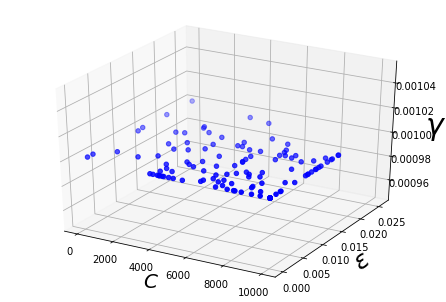






Mean Squared Error for the ARIMA Model:	 346424.193584

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 239730.425487

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 270341.803488

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 244431.165208

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 261101.985975

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 244362.777304

Best Configuration Found:

SVR(C=7809.747909672637, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.008032938955763104, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



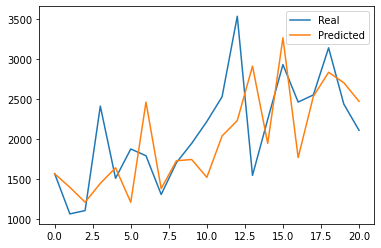


Ensemble Model series` predicitions:



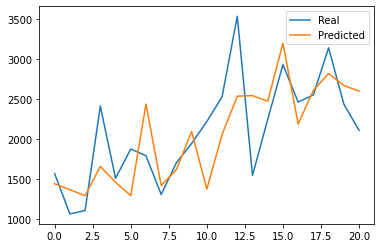


Ensemble Model best Average series` predicitions:



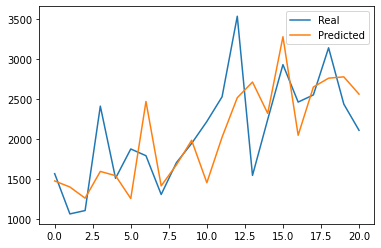


Ensemble Model K best Average series` predicitions:



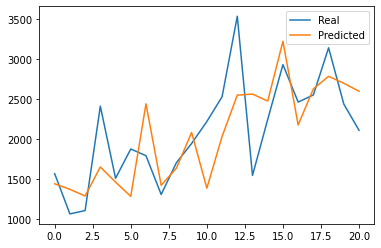


Ensemble Model best Median series` predicitions:



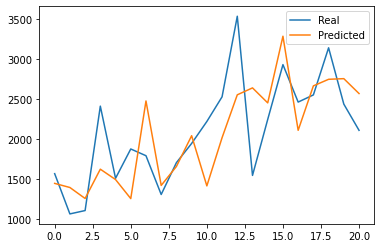


Ensemble Model K best Median series` predicitions:



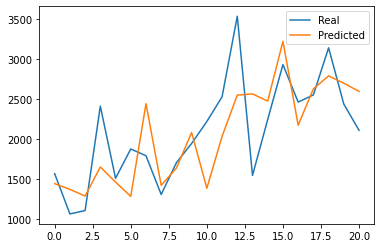






 Displaying Results for the test set



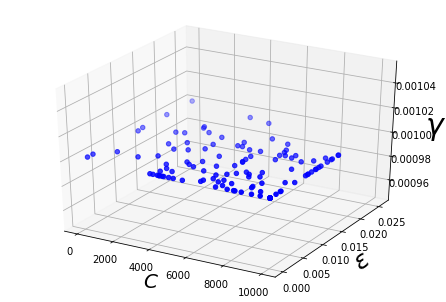






Mean Squared Error for the ARIMA Model:	 504647.685692

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 485050.392280

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 476278.156745

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 446347.984138

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 485589.432833

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 442358.623457

Best Configuration Found:

SVR(C=7809.747909672637, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.008032938955763104, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



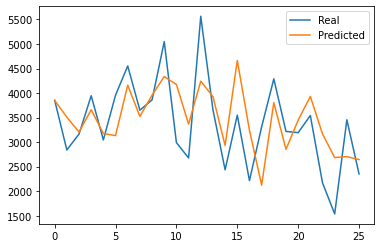


Ensemble Model series` predicitions:



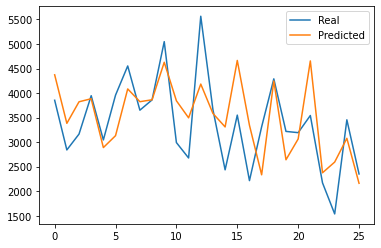


Ensemble Model best Average series` predicitions:



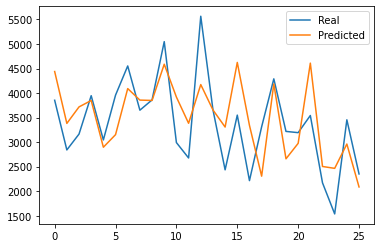


Ensemble Model K best Average series` predicitions:



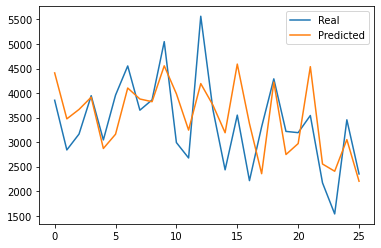


Ensemble Model best Median series` predicitions:



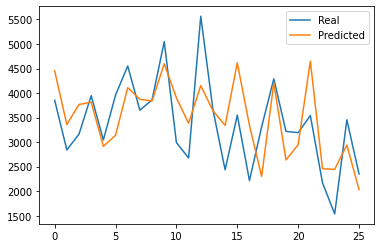


Ensemble Model K best Median series` predicitions:



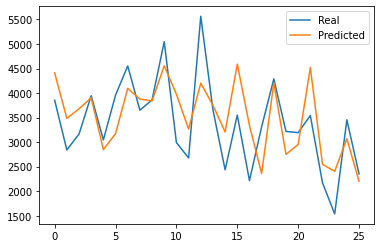






Best G-best on val set: Experiment # 3 . Mean Squared Error = 239730.425487


Best G-best on test set: Experiment # 4 . Mean Squared Error = 485050.392280



In [75]:
pso(120, 100, 3, 1, 10, 5)

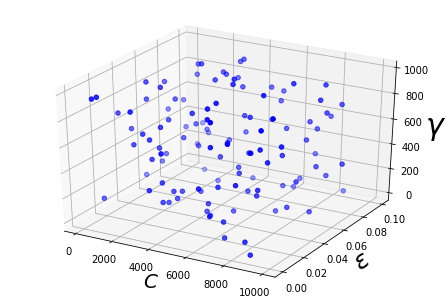






Experiment # 1: done. MSE_g_Best_val: 239349.124912; MSE_AV_val: 263645.007273; MSE_MD_val: 258883.485228; MSE_k_AV_val: 245523.161358; MSE_k_MD_val: 245326.983665


MSE_g_Best: 485765.497594; MSE_AV: 467323.250543; MSE_MD: 488619.205833; MSE_k_AV: 446239.452778; MSE_k_MD: 452177.204016


Experiment # 2: done. MSE_g_Best_val: 240305.948304; MSE_AV_val: 265925.442216; MSE_MD_val: 258464.755908; MSE_k_AV_val: 246909.732828; MSE_k_MD_val: 247678.462250


MSE_g_Best: 484874.046563; MSE_AV: 466565.228373; MSE_MD: 489341.480074; MSE_k_AV: 452002.055453; MSE_k_MD: 456832.028686


Experiment # 3: done. MSE_g_Best_val: 240597.846741; MSE_AV_val: 263797.944612; MSE_MD_val: 259225.300097; MSE_k_AV_val: 246152.720703; MSE_k_MD_val: 246725.802450


MSE_g_Best: 485031.247956; MSE_AV: 467778.553381; MSE_MD: 488786.819664; MSE_k_AV: 454100.832334; MSE_k_MD: 458845.392058


Experiment # 4: done. MSE_g_Best_val: 240079.521192; MSE_AV_val: 264362.337261; MSE_MD_val: 257319.682851; MSE_k_AV_val: 2462

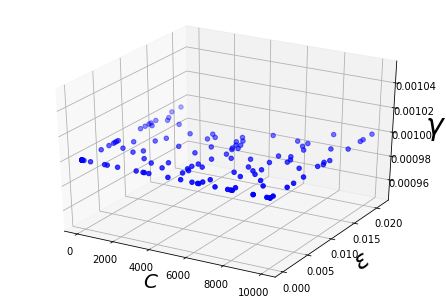






Mean Squared Error for the ARIMA Model:	 346424.193584

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 239349.124912

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 263645.007273

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 245523.161358

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 258883.485228

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 245326.983665

Best Configuration Found:

SVR(C=3803.5104070749585, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.0073432607136462835, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



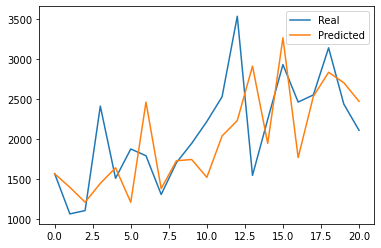


Ensemble Model series` predicitions:



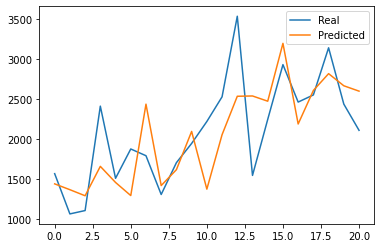


Ensemble Model best Average series` predicitions:



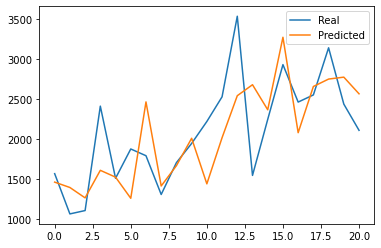


Ensemble Model K best Average series` predicitions:



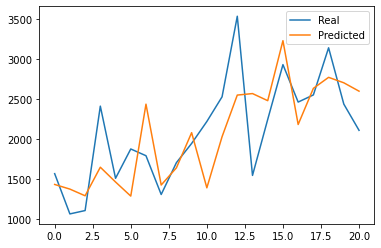


Ensemble Model best Median series` predicitions:



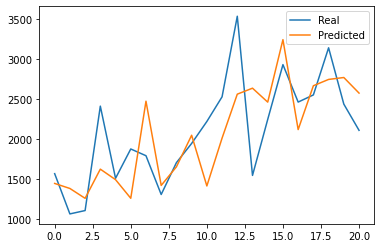


Ensemble Model K best Median series` predicitions:



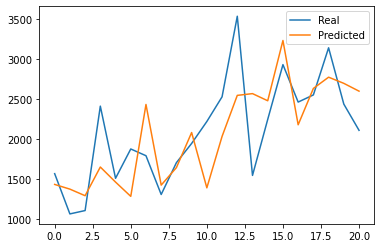






 Displaying Results for the test set



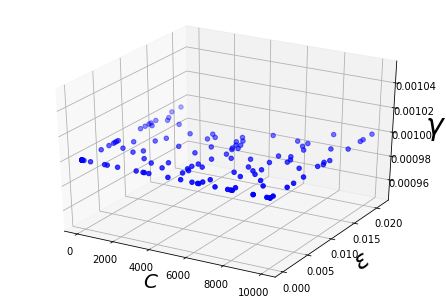






Mean Squared Error for the ARIMA Model:	 504647.685692

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 484874.046563

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 466565.228373

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 452002.055453

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 489341.480074

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 456832.028686

Best Configuration Found:

SVR(C=3803.5104070749585, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.0073432607136462835, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



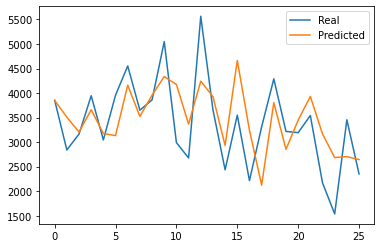


Ensemble Model series` predicitions:



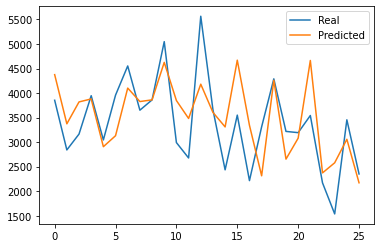


Ensemble Model best Average series` predicitions:



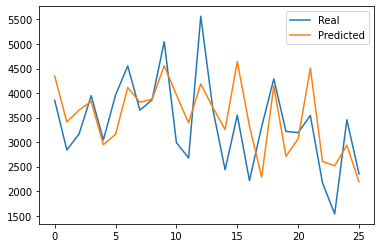


Ensemble Model K best Average series` predicitions:



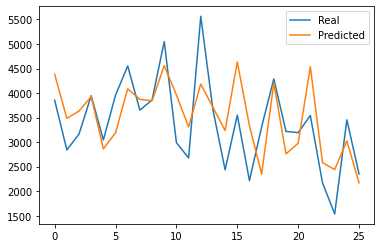


Ensemble Model best Median series` predicitions:



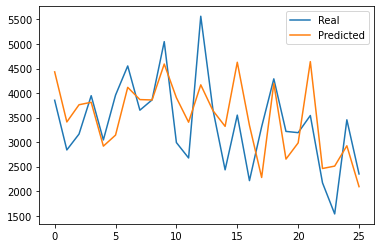


Ensemble Model K best Median series` predicitions:



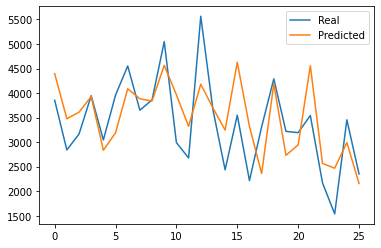






Best G-best on val set: Experiment # 1 . Mean Squared Error = 239349.124912


Best G-best on test set: Experiment # 2 . Mean Squared Error = 484874.046563



In [76]:
pso(120, 100, 3, 1, 20, 5)

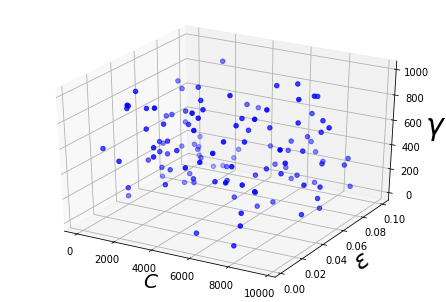






Experiment # 1: done. MSE_g_Best_val: 241708.957164; MSE_AV_val: 263924.466144; MSE_MD_val: 260122.374049; MSE_k_AV_val: 247140.082189; MSE_k_MD_val: 247334.713034


MSE_g_Best: 483997.716526; MSE_AV: 466506.912002; MSE_MD: 482794.710020; MSE_k_AV: 450367.460385; MSE_k_MD: 454544.128364


Experiment # 2: done. MSE_g_Best_val: 240258.794009; MSE_AV_val: 261341.313244; MSE_MD_val: 257957.912441; MSE_k_AV_val: 246554.526039; MSE_k_MD_val: 247413.747689


MSE_g_Best: 485366.480857; MSE_AV: 468195.958768; MSE_MD: 484603.724726; MSE_k_AV: 447807.681452; MSE_k_MD: 450984.955726


Experiment # 3: done. MSE_g_Best_val: 240137.174021; MSE_AV_val: 263090.604064; MSE_MD_val: 258450.635234; MSE_k_AV_val: 246378.858716; MSE_k_MD_val: 246902.327749


MSE_g_Best: 485341.821622; MSE_AV: 467988.805887; MSE_MD: 482408.536052; MSE_k_AV: 454433.612045; MSE_k_MD: 458079.873989


Experiment # 4: done. MSE_g_Best_val: 245277.109360; MSE_AV_val: 266981.913359; MSE_MD_val: 250274.808332; MSE_k_AV_val: 2488

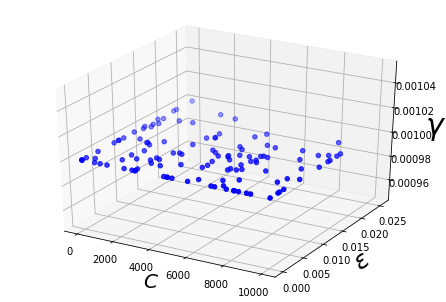






Mean Squared Error for the ARIMA Model:	 346424.193584

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 240137.174021

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 263090.604064

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 246378.858716

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 258450.635234

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 246902.327749

Best Configuration Found:

SVR(C=4597.268671599226, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.006771933647675628, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



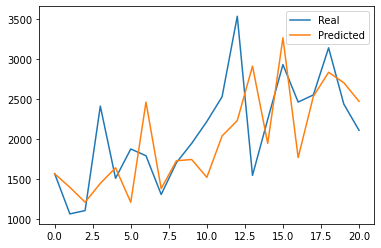


Ensemble Model series` predicitions:



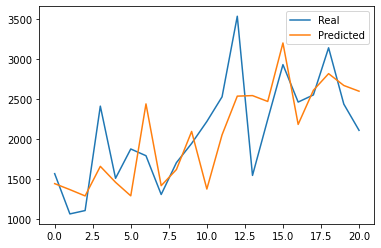


Ensemble Model best Average series` predicitions:



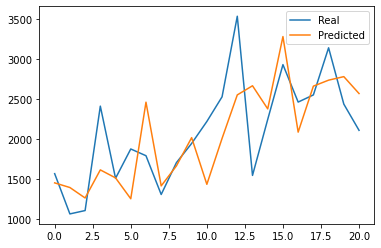


Ensemble Model K best Average series` predicitions:



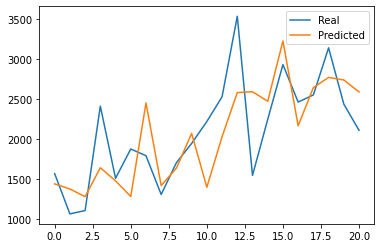


Ensemble Model best Median series` predicitions:



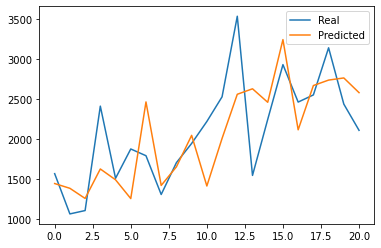


Ensemble Model K best Median series` predicitions:



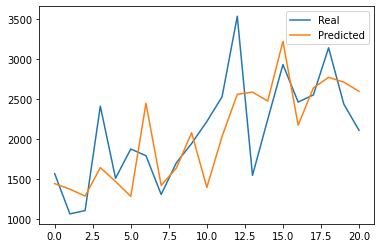






 Displaying Results for the test set



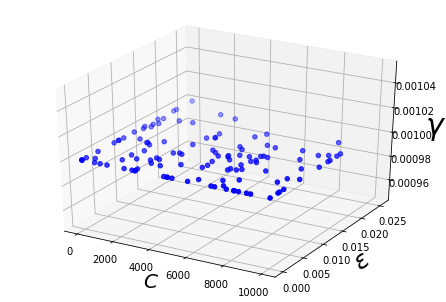






Mean Squared Error for the ARIMA Model:	 504647.685692

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 483997.716526

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 466506.912002

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 450367.460385

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 482794.710020

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 454544.128364

Best Configuration Found:

SVR(C=4597.268671599226, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.006771933647675628, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



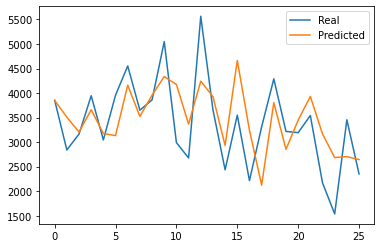


Ensemble Model series` predicitions:



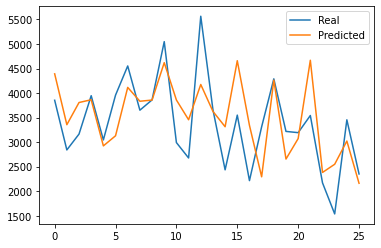


Ensemble Model best Average series` predicitions:



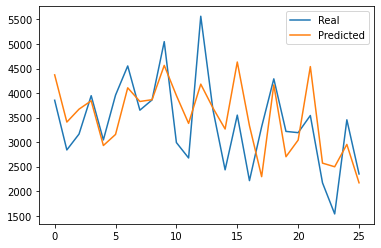


Ensemble Model K best Average series` predicitions:



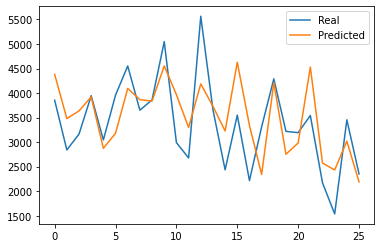


Ensemble Model best Median series` predicitions:



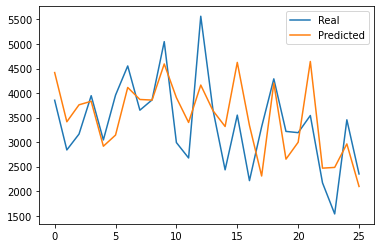


Ensemble Model K best Median series` predicitions:



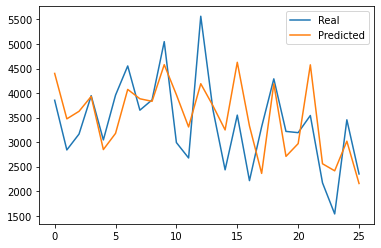






Best G-best on val set: Experiment # 3 . Mean Squared Error = 240137.174021


Best G-best on test set: Experiment # 1 . Mean Squared Error = 483997.716526



In [77]:
pso(120, 100, 3, 1, 30, 5)

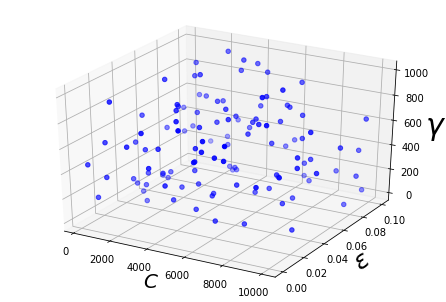






Experiment # 1: done. MSE_g_Best_val: 240614.590169; MSE_AV_val: 261642.428503; MSE_MD_val: 258493.666819; MSE_k_AV_val: 247847.780124; MSE_k_MD_val: 249286.561841


MSE_g_Best: 484645.013465; MSE_AV: 469918.151412; MSE_MD: 487511.882572; MSE_k_AV: 463925.264731; MSE_k_MD: 467929.745055


Experiment # 2: done. MSE_g_Best_val: 239667.621646; MSE_AV_val: 269970.086003; MSE_MD_val: 261597.506009; MSE_k_AV_val: 249103.220274; MSE_k_MD_val: 249668.642336


MSE_g_Best: 485199.315263; MSE_AV: 462820.010054; MSE_MD: 484105.061454; MSE_k_AV: 457206.043438; MSE_k_MD: 459661.661803


Experiment # 3: done. MSE_g_Best_val: 240592.337777; MSE_AV_val: 258326.584635; MSE_MD_val: 257319.404639; MSE_k_AV_val: 247894.685607; MSE_k_MD_val: 248933.919958


MSE_g_Best: 484666.386545; MSE_AV: 476082.801942; MSE_MD: 484100.042495; MSE_k_AV: 462691.087271; MSE_k_MD: 469297.164133


Experiment # 4: done. MSE_g_Best_val: 242439.702974; MSE_AV_val: 257737.620817; MSE_MD_val: 259003.311616; MSE_k_AV_val: 2482

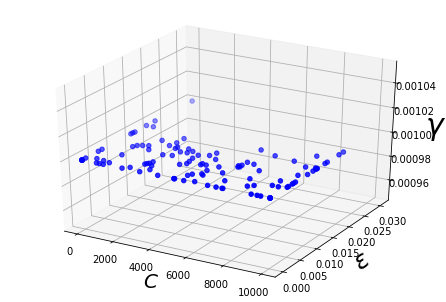






Mean Squared Error for the ARIMA Model:	 346424.193584

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 239667.621646

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 269970.086003

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 249103.220274

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 261597.506009

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 249668.642336

Best Configuration Found:

SVR(C=4864.836677201904, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.007532297187701112, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



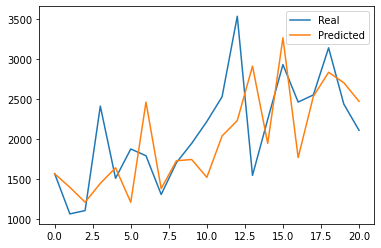


Ensemble Model series` predicitions:



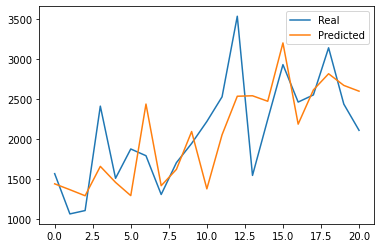


Ensemble Model best Average series` predicitions:



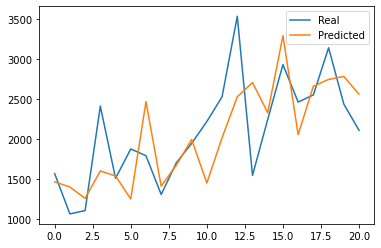


Ensemble Model K best Average series` predicitions:



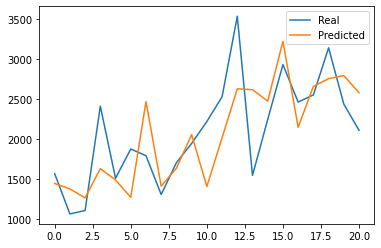


Ensemble Model best Median series` predicitions:



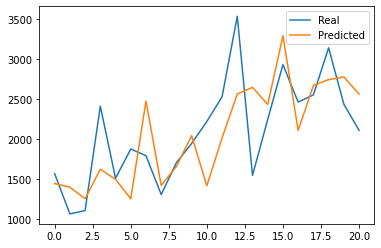


Ensemble Model K best Median series` predicitions:



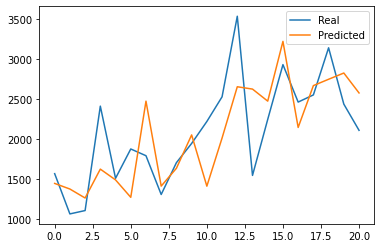






 Displaying Results for the test set



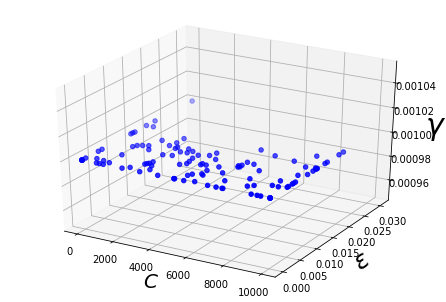






Mean Squared Error for the ARIMA Model:	 504647.685692

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 484645.013465

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 469918.151412

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 463925.264731

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 487511.882572

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 467929.745055

Best Configuration Found:

SVR(C=4864.836677201904, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.007532297187701112, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



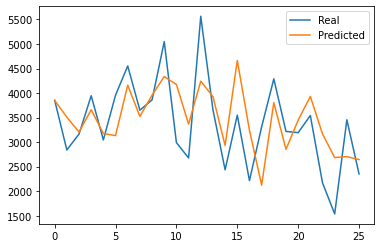


Ensemble Model series` predicitions:



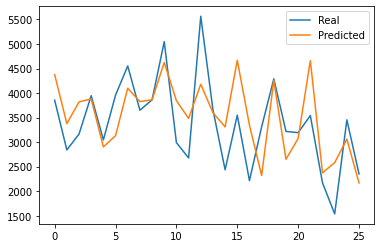


Ensemble Model best Average series` predicitions:



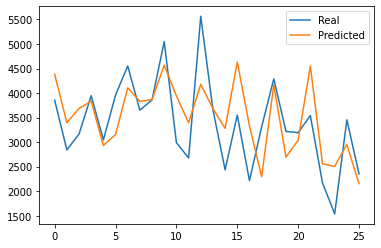


Ensemble Model K best Average series` predicitions:



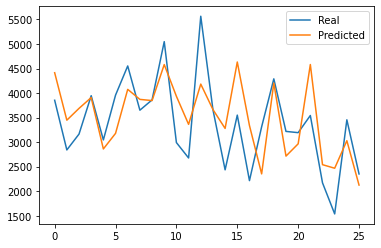


Ensemble Model best Median series` predicitions:



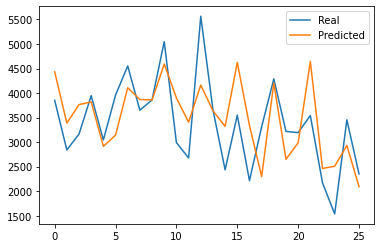


Ensemble Model K best Median series` predicitions:



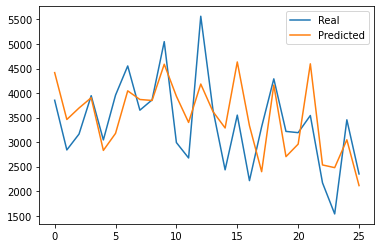






Best G-best on val set: Experiment # 2 . Mean Squared Error = 239667.621646


Best G-best on test set: Experiment # 1 . Mean Squared Error = 484645.013465



In [78]:
pso(120, 100, 3, 1, 40, 5)

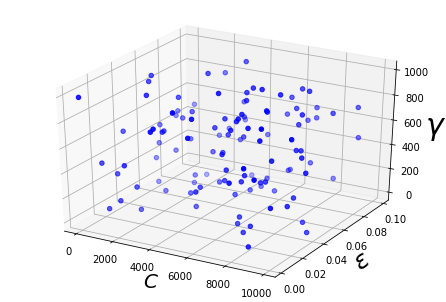






Experiment # 1: done. MSE_g_Best_val: 240314.744870; MSE_AV_val: 261183.484015; MSE_MD_val: 257387.380785; MSE_k_AV_val: 247887.138454; MSE_k_MD_val: 249408.935872


MSE_g_Best: 484946.993002; MSE_AV: 471346.072642; MSE_MD: 488389.308405; MSE_k_AV: 469956.690519; MSE_k_MD: 480686.735727


Experiment # 2: done. MSE_g_Best_val: 240062.179733; MSE_AV_val: 266992.877749; MSE_MD_val: 259445.031637; MSE_k_AV_val: 249371.193506; MSE_k_MD_val: 250672.268767


MSE_g_Best: 484495.358256; MSE_AV: 465689.320101; MSE_MD: 489354.861887; MSE_k_AV: 464392.118786; MSE_k_MD: 471190.810021


Experiment # 3: done. MSE_g_Best_val: 245844.889492; MSE_AV_val: 270593.186082; MSE_MD_val: 253570.897272; MSE_k_AV_val: 249244.019018; MSE_k_MD_val: 249669.539161


MSE_g_Best: 496103.244128; MSE_AV: 464005.949339; MSE_MD: 489297.974299; MSE_k_AV: 470991.678530; MSE_k_MD: 489435.045648


Experiment # 4: done. MSE_g_Best_val: 240591.473606; MSE_AV_val: 261880.601361; MSE_MD_val: 257535.893211; MSE_k_AV_val: 2490

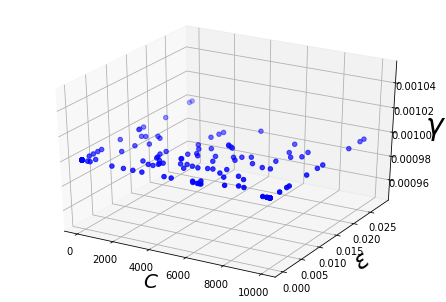






Mean Squared Error for the ARIMA Model:	 346424.193584

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 240062.179733

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 266992.877749

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 249371.193506

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 259445.031637

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 250672.268767

Best Configuration Found:

SVR(C=3592.102631433485, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.007243341552348187, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



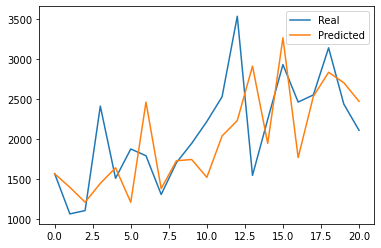


Ensemble Model series` predicitions:



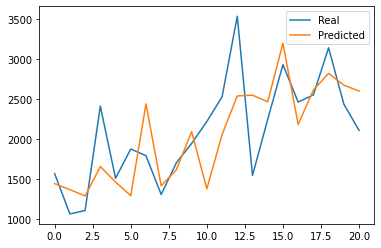


Ensemble Model best Average series` predicitions:



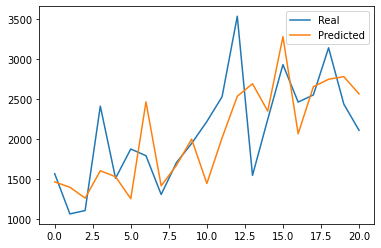


Ensemble Model K best Average series` predicitions:



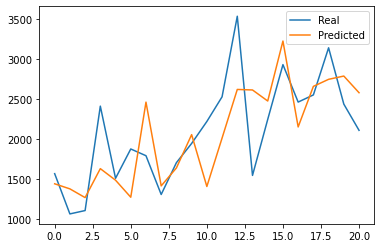


Ensemble Model best Median series` predicitions:



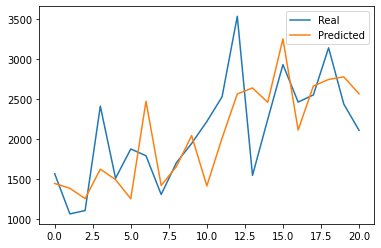


Ensemble Model K best Median series` predicitions:



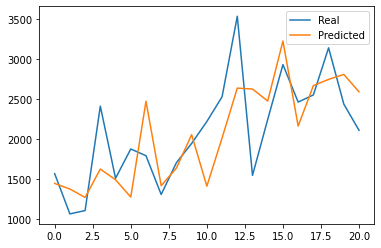






 Displaying Results for the test set



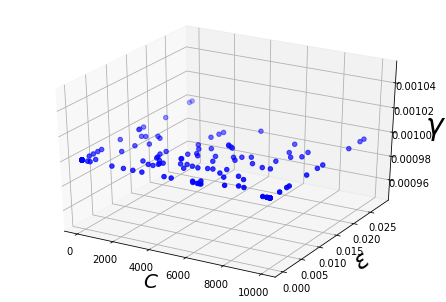






Mean Squared Error for the ARIMA Model:	 504647.685692

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 484495.358256

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 465689.320101

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 464392.118786

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 489354.861887

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 471190.810021

Best Configuration Found:

SVR(C=3592.102631433485, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.007243341552348187, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



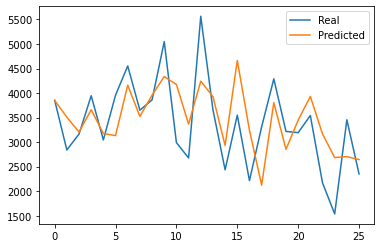


Ensemble Model series` predicitions:



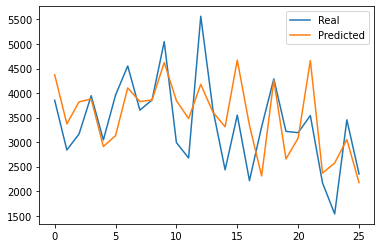


Ensemble Model best Average series` predicitions:



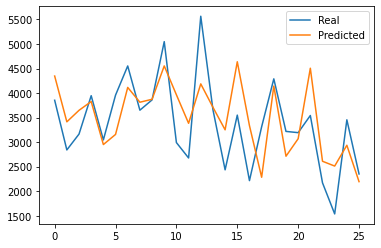


Ensemble Model K best Average series` predicitions:



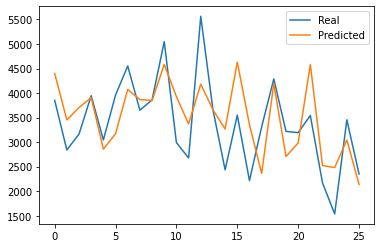


Ensemble Model best Median series` predicitions:



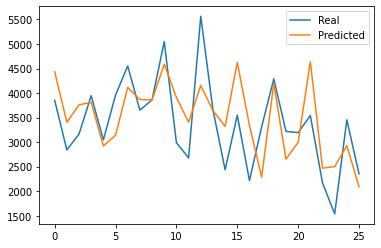


Ensemble Model K best Median series` predicitions:



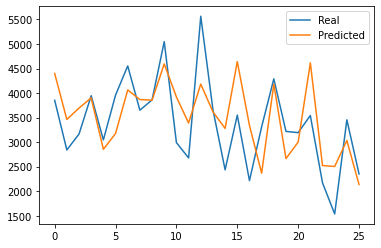






Best G-best on val set: Experiment # 2 . Mean Squared Error = 240062.179733


Best G-best on test set: Experiment # 2 . Mean Squared Error = 484495.358256



In [79]:
pso(120, 100, 3, 1, 50, 5)

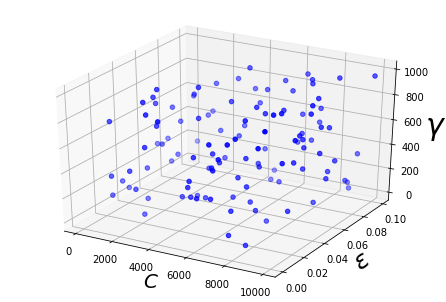






Experiment # 1: done. MSE_g_Best_val: 239634.249454; MSE_AV_val: 260508.824703; MSE_MD_val: 257183.129497; MSE_k_AV_val: 249881.340032; MSE_k_MD_val: 250713.525284


MSE_g_Best: 484879.271230; MSE_AV: 472849.173877; MSE_MD: 489444.954414; MSE_k_AV: 468352.085036; MSE_k_MD: 476538.022638


Experiment # 2: done. MSE_g_Best_val: 239952.820665; MSE_AV_val: 269396.199094; MSE_MD_val: 260164.308791; MSE_k_AV_val: 250355.170691; MSE_k_MD_val: 250868.558758


MSE_g_Best: 485429.155568; MSE_AV: 464576.130858; MSE_MD: 491077.133357; MSE_k_AV: 468753.704070; MSE_k_MD: 475200.821400


Experiment # 3: done. MSE_g_Best_val: 242414.353828; MSE_AV_val: 258360.714755; MSE_MD_val: 259394.871441; MSE_k_AV_val: 249281.227817; MSE_k_MD_val: 252389.805245


MSE_g_Best: 486767.531799; MSE_AV: 478688.546231; MSE_MD: 480179.668490; MSE_k_AV: 468165.962057; MSE_k_MD: 473165.065156


Experiment # 4: done. MSE_g_Best_val: 241444.999530; MSE_AV_val: 259709.134677; MSE_MD_val: 258585.835499; MSE_k_AV_val: 2513

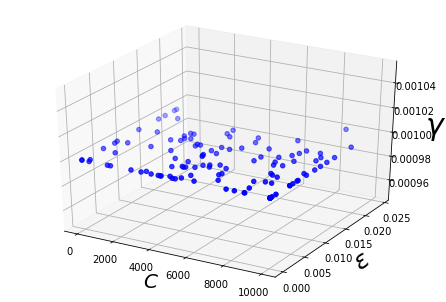






Mean Squared Error for the ARIMA Model:	 346424.193584

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 239454.223728

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 265819.058383

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 249388.338358

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 259527.752311

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 249953.252853

Best Configuration Found:

SVR(C=5397.936657498539, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.007563445402083088, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



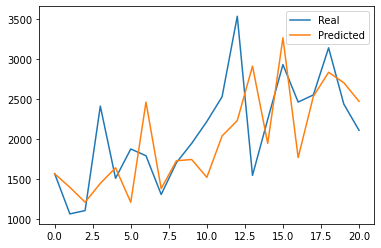


Ensemble Model series` predicitions:



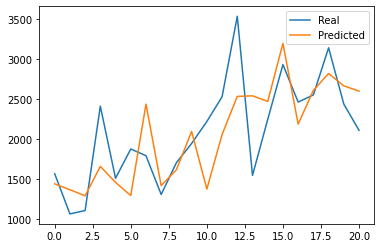


Ensemble Model best Average series` predicitions:



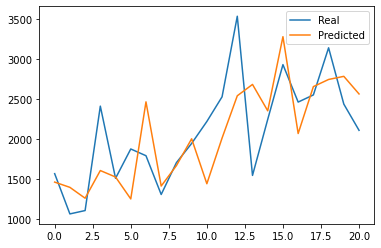


Ensemble Model K best Average series` predicitions:



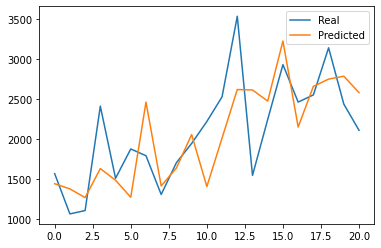


Ensemble Model best Median series` predicitions:



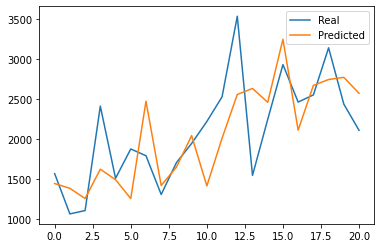


Ensemble Model K best Median series` predicitions:



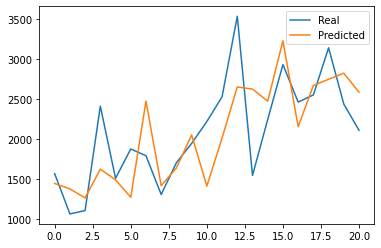






 Displaying Results for the test set



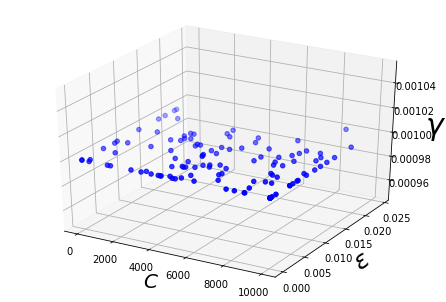






Mean Squared Error for the ARIMA Model:	 504647.685692

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 484879.271230

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 472849.173877

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 468352.085036

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 489444.954414

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 476538.022638

Best Configuration Found:

SVR(C=5397.936657498539, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.007563445402083088, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



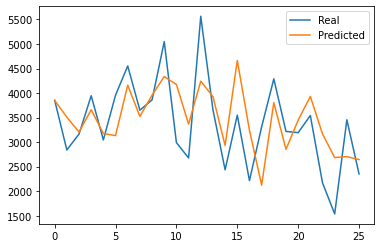


Ensemble Model series` predicitions:



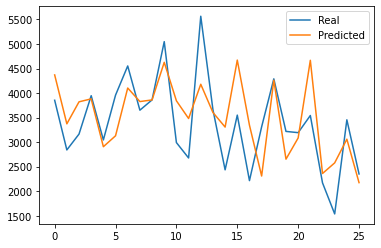


Ensemble Model best Average series` predicitions:



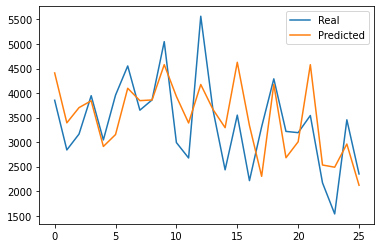


Ensemble Model K best Average series` predicitions:



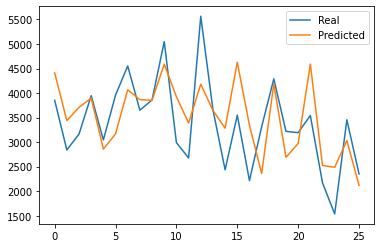


Ensemble Model best Median series` predicitions:



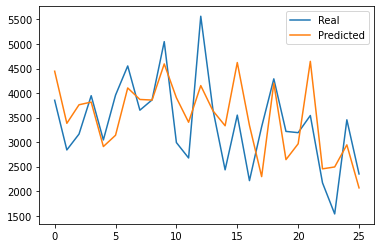


Ensemble Model K best Median series` predicitions:



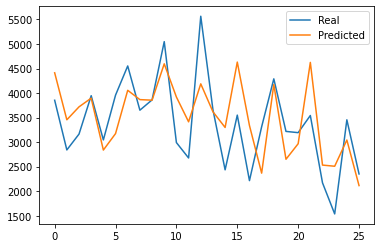






Best G-best on val set: Experiment # 5 . Mean Squared Error = 239454.223728


Best G-best on test set: Experiment # 1 . Mean Squared Error = 484879.271230



In [80]:
pso(120, 100, 3, 1, 60, 5)